1.7121


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


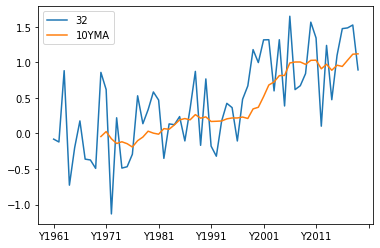

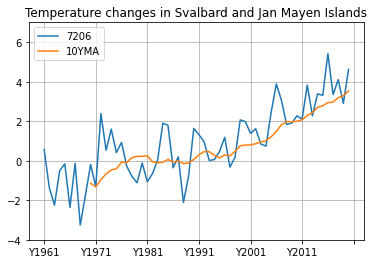

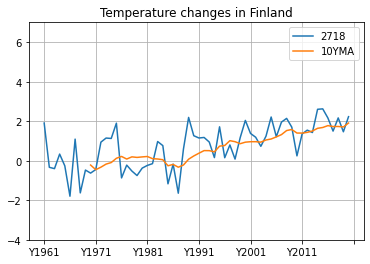

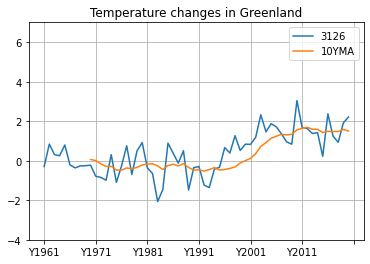

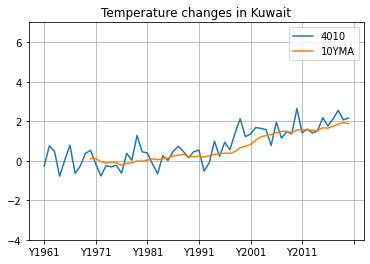

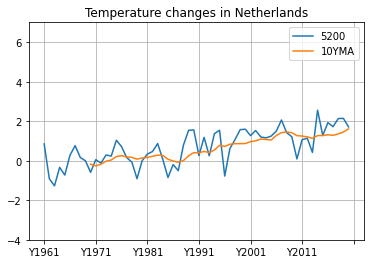

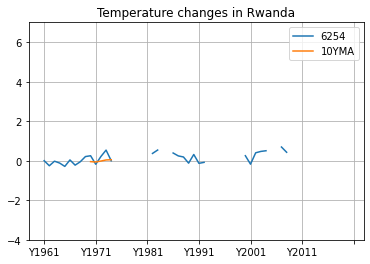

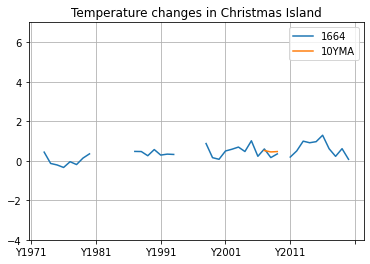

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='cp1252')

# Let's only keep the Meteorological year
# Let's only keep "Temperature change"
df_by_year = df.loc[(df["Months"] == "Meteorological year") & (df["Element"] == "Temperature change")]
df_by_year

# Let's first do this with a single country
afg = df_by_year.loc[df['Area'] == "Afghanistan"]

# Let's remove non-relevant columns
afg2 = afg.drop(columns=['Area Code', 'Area', 'Months', 'Months Code', 'Element Code', 'Element', 'Unit']).T
afg2

afg2['10YMA'] = afg2.rolling(10).mean()
afg2


# What is the highest and lowest 10YMA
afg2.plot()
afg2.dropna(inplace=True)


low = afg2.sort_values(by='10YMA').iloc[0]['10YMA']
high = afg2.sort_values(by='10YMA').iloc[-1]['10YMA']
biggest_dif = high - low
biggest_dif

# Now let's write a function to do this
def get_biggest_increase(country_row):
    # country_row is a Series

    # Remove non-relevant labels
    df2 = country_row.drop(labels=['Area Code', 'Area', 'Months', 'Months Code', 'Element Code', 'Element', 'Unit'])

    moving_averages = df2.rolling(10).mean()
    # Rolling produces some NaN values that we can drop
    moving_averages.dropna(inplace=True)

    if len(moving_averages) == 0:
        # Found some countries with only NaN values
        return np.nan

    # What is the highest and lowest 10YMA?
    sorted = moving_averages.sort_values()    

    return sorted[-1] - sorted[0]

# Check for single country
single_country = df_by_year.loc[df_by_year['Area'] == "Netherlands"].squeeze()
print(get_biggest_increase(single_country))
# df_by_year.loc[df_by_year['Area'] == "Afghanistan"].apply(get_biggest_increase, axis=1)


# Add column with this calculated value
# We can ignore the warning here
df_by_year['biggest_difference'] = df_by_year.apply(get_biggest_increase, axis=1)

# Drop regions with NaN as biggest difference
df_by_year.dropna(subset=['biggest_difference'], inplace=True)
df_by_year.sort_values(by='biggest_difference')

# Let's make it visible too
def show_temp_changes(df, country):
    df = df.loc[df['Area'] == country]

    # Let's remove non-relevant columns
    df = df.drop(columns=['Area Code', 'Area', 'Months', 'Months Code', 'Element Code', 'Element', 'Unit']).T
    df['10YMA'] = df.rolling(10).mean()
    df.plot(title=f"Temperature changes in {country}", ylim=(-4,7), grid=True)

# High changes
show_temp_changes(df_by_year, "Svalbard and Jan Mayen Islands") # See https://en.wikipedia.org/wiki/Climate_of_Svalbard#Climate_change_in_Svalbard
show_temp_changes(df_by_year, "Finland") # https://en.wikipedia.org/wiki/Climate_change_in_Finland#Temperature_and_weather_changes
show_temp_changes(df_by_year, "Greenland")
show_temp_changes(df_by_year, "Kuwait")

# Low changes
show_temp_changes(df_by_year, "Netherlands")


# Not enough data to properly calculate 10YMA 
show_temp_changes(df_by_year, "Rwanda")
show_temp_changes(df_by_year, "Christmas Island") 